# Part 1: Building a dataset of dead raccoons reported in NYC
Data source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data
Downloaded a subset of the data on 7-13-24 that were reports that specifically mentioned "dead animal."

The two csvs exported from this were used in my QGIS analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('311_dead_animals_20240713.csv')
df.head()

/var/folders/v6/gl0vmz3x7_35wvmcn3_6vxf40000gn/T/ipykernel_18259/1784697655.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_dead_animals_20240713.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,61774331,07/11/2024 11:03:09 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Other,Street,11209.0,79 STREET,...,NaN,40.629199,-74.031656,"(40.62919868972188, -74.03165627560213)",17216.0,10.0,2.0,44.0,41.0,41.0
1,61768592,07/11/2024 09:58:00 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11355.0,FRANKLIN AVENUE,...,NaN,40.756266,-73.823513,"(40.75626590521943, -73.82351345876539)",14190.0,22.0,3.0,3.0,67.0,67.0
2,61770887,07/11/2024 09:48:42 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,11377.0,48-03 65 STREET,...,NaN,40.738342,-73.900834,"(40.73834187384207, -73.90083403872794)",14787.0,53.0,3.0,34.0,66.0,66.0
3,61771971,07/11/2024 08:15:19 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Sidewalk,11230.0,919 FOSTER AVENUE,...,NaN,40.631776,-73.967874,"(40.631775916320905, -73.9678741423961)",13513.0,60.0,2.0,11.0,43.0,43.0
4,61773254,07/11/2024 08:12:26 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11229.0,2139 FORD STREET,...,NaN,40.599721,-73.937889,"(40.5997209069526, -73.93788933448488)",13512.0,32.0,2.0,8.0,36.0,36.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36602 entries, 0 to 36601
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      36602 non-null  int64  
 1   Created Date                    36602 non-null  object 
 2   Closed Date                     36463 non-null  object 
 3   Agency                          36602 non-null  object 
 4   Agency Name                     36602 non-null  object 
 5   Complaint Type                  36602 non-null  object 
 6   Descriptor                      36602 non-null  object 
 7   Location Type                   36577 non-null  object 
 8   Incident Zip                    35067 non-null  float64
 9   Incident Address                29742 non-null  object 
 10  Street Name                     29742 non-null  object 
 11  Cross Street 1                  29686 non-null  object 
 12  Cross Street 2                  

In [4]:
df['Complaint Type'].value_counts()

Complaint Type
Dead Animal          28063
Animal in a Park      5077
Highway Condition     3462
Name: count, dtype: int64

In [5]:
df['Agency'].value_counts()

Agency
DSNY    28063
DPR      5077
DOT      3462
Name: count, dtype: int64

In [6]:
# make a year column
df['year'] = df['Created Date'].str[6:10]
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
0,61774331,07/11/2024 11:03:09 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Other,Street,11209.0,79 STREET,...,40.629199,-74.031656,"(40.62919868972188, -74.03165627560213)",17216.0,10.0,2.0,44.0,41.0,41.0,2024
1,61768592,07/11/2024 09:58:00 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11355.0,FRANKLIN AVENUE,...,40.756266,-73.823513,"(40.75626590521943, -73.82351345876539)",14190.0,22.0,3.0,3.0,67.0,67.0,2024
2,61770887,07/11/2024 09:48:42 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,11377.0,48-03 65 STREET,...,40.738342,-73.900834,"(40.73834187384207, -73.90083403872794)",14787.0,53.0,3.0,34.0,66.0,66.0,2024
3,61771971,07/11/2024 08:15:19 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Sidewalk,11230.0,919 FOSTER AVENUE,...,40.631776,-73.967874,"(40.631775916320905, -73.9678741423961)",13513.0,60.0,2.0,11.0,43.0,43.0,2024
4,61773254,07/11/2024 08:12:26 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11229.0,2139 FORD STREET,...,40.599721,-73.937889,"(40.5997209069526, -73.93788933448488)",13512.0,32.0,2.0,8.0,36.0,36.0,2024


In [7]:
df.groupby('Agency')['year'].value_counts()
# DSNY is the only one whose data doesnt go back beyond 2021

Agency  year
DOT     2018      329
        2017      280
        2010      265
        2019      263
        2014      257
        2023      254
        2011      237
        2016      223
        2021      223
        2012      221
        2015      209
        2013      198
        2022      179
        2020      162
        2024      162
DPR     2022      452
        2023      424
        2021      412
        2018      378
        2010      374
        2017      372
        2019      357
        2016      342
        2020      334
        2012      319
        2015      318
        2013      273
        2011      271
        2014      236
        2024      215
DSNY    2023    10591
        2022     9562
        2024     5155
        2021     2755
Name: count, dtype: int64

In [9]:
df_years = pd.DataFrame(df.value_counts('year'))

<Axes: xlabel='year'>

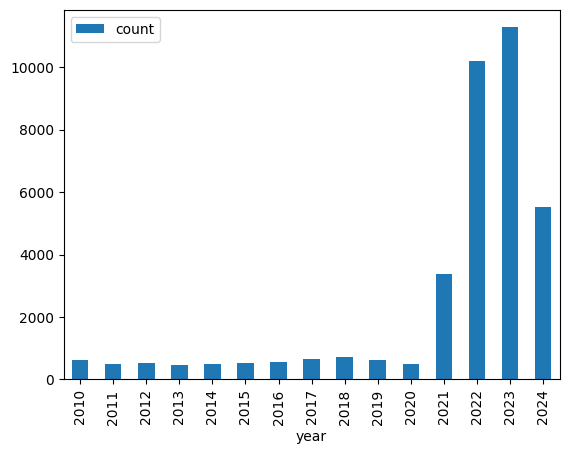

In [11]:
df_years.sort_values('year', ascending = True).plot.bar()
# The number before sanitation data appears is way lower, so data can be limited to DSNY reports from 2021 on.

In [12]:
# Pulling only the ones that are confirmed?
confirmed_reports = ['The Department of Sanitation removed the items.', 'The Department of Sanitation cleaned the location.', 'The Department of Parks and Recreation has completed the requested work order and corrected the problem.', 'General maintenance and cleaning is on a regular schedule. The next scheduled maintenance and cleaning will correct the condition.', 'NYC Parks has reviewed the reported condition and corrected the problem.', 
                    'The Department of Sanitation has investigated the complaint and addressed the issue. If the problem persists, call 311 to enter a new complaint. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).',
                    'The Department of Transportation has completed the request or corrected the condition.', 'The Department of Sanitation collected the requested items.']

filtered_df = df[df['Resolution Description'].isin(confirmed_reports)]
filtered_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
9,61774344,07/11/2024 06:25:43 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,10307.0,5 LULU COURT,...,40.503558,-74.232106,"(40.503558163874196, -74.23210562607646)",10694.0,15.0,1.0,9.0,77.0,77.0,2024
17,61776859,07/11/2024 02:43:12 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,10003.0,311 EAST 9 STREET,...,40.728969,-73.986715,"(40.7289692964005, -73.98671527098428)",11724.0,70.0,4.0,50.0,5.0,5.0,2024
24,61776772,07/11/2024 10:52:16 AM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11203.0,742 EAST 48 STREET,...,40.643272,-73.931438,"(40.64327160176032, -73.93143837032017)",16866.0,61.0,2.0,26.0,40.0,40.0,2024
28,61771972,07/11/2024 09:26:18 AM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,10469.0,1274 ADEE AVENUE,...,40.869380,-73.849814,"(40.86938037167996, -73.84981354471181)",11607.0,59.0,5.0,2.0,32.0,32.0,2024
33,61770779,07/11/2024 08:54:23 AM,07/11/2024 03:18:14 PM,DSNY,Department of Sanitation,Dead Animal,Squirrel,Street,11415.0,85-12 120 STREET,...,40.702689,-73.831110,"(40.70268858766772, -73.83111014955556)",24011.0,46.0,3.0,28.0,60.0,60.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36589,15744928,01/16/2010 04:15:26 PM,01/16/2010 04:19:50 PM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,10021.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
36590,15739590,01/16/2010 01:25:40 AM,01/16/2010 09:36:43 AM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,10024.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
36595,15712847,01/12/2010 04:39:38 PM,01/12/2010 04:50:53 PM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,10021.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
36598,15695873,01/10/2010 02:19:37 PM,01/10/2010 02:58:40 PM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,10312.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [13]:
filtered_df['Agency'].value_counts()

Agency
DSNY    14530
DPR      3962
DOT      2633
Name: count, dtype: int64

In [14]:
filtered_raccoons = filtered_df[filtered_df['Descriptor'] == 'Raccoon']
len(filtered_raccoons)

2173

In [16]:
filtered_raccoons['Agency'].value_counts()

Agency
DSNY    2173
Name: count, dtype: int64

In [17]:
filtered_raccoons['year'].value_counts()

year
2023    842
2022    795
2024    297
2021    239
Name: count, dtype: int64

In [18]:
filtered_raccoons.to_csv('filtered_raccoons.csv')

In [19]:
# Checking how many are missing lat/long coordinates for the spatial analysis:
null_coords = filtered_df[filtered_df['Latitude'].isnull()]
null_coords.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
89,61750414,07/09/2024 02:18:02 PM,07/10/2024 06:06:29 AM,DOT,Department of Transportation,Highway Condition,Dead Animal,Highway,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
144,61732078,07/07/2024 03:57:31 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Opossum,Street,11691.0,BAY 25 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
318,61693056,07/03/2024 08:51:31 AM,07/05/2024 01:30:25 PM,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,11221.0,MENAHAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
361,61664395,07/02/2024 12:56:27 AM,07/03/2024 02:14:01 PM,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11363.0,LITTLE NECK PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
548,61619295,06/26/2024 12:20:07 PM,07/01/2024 03:51:24 PM,DOT,Department of Transportation,Highway Condition,Dead Animal,Highway,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024


In [20]:
len(null_coords)

2821

In [21]:
null_coords['year'].value_counts()
# Not that many in the years for this analysis

year
2023    257
2019    248
2022    241
2010    216
2021    212
2018    211
2017    199
2016    193
2012    180
2015    177
2013    164
2014    138
2011    138
2024    132
2020    115
Name: count, dtype: int64

In [22]:
null_coords['Agency'].value_counts()
# It's mostly the parks dept that's missing coordinates

Agency
DPR     1742
DOT      642
DSNY     437
Name: count, dtype: int64

In [23]:
# Filtering for just the years that there's sanitation data for since it changes things so much.
dsny_years = ['2021', '2022', '2023', '2024']

recent_df = df[df['year'].isin(dsny_years)]
recent_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
0,61774331,07/11/2024 11:03:09 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Other,Street,11209.0,79 STREET,...,40.629199,-74.031656,"(40.62919868972188, -74.03165627560213)",17216.0,10.0,2.0,44.0,41.0,41.0,2024
1,61768592,07/11/2024 09:58:00 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11355.0,FRANKLIN AVENUE,...,40.756266,-73.823513,"(40.75626590521943, -73.82351345876539)",14190.0,22.0,3.0,3.0,67.0,67.0,2024
2,61770887,07/11/2024 09:48:42 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,11377.0,48-03 65 STREET,...,40.738342,-73.900834,"(40.73834187384207, -73.90083403872794)",14787.0,53.0,3.0,34.0,66.0,66.0,2024
3,61771971,07/11/2024 08:15:19 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Sidewalk,11230.0,919 FOSTER AVENUE,...,40.631776,-73.967874,"(40.631775916320905, -73.9678741423961)",13513.0,60.0,2.0,11.0,43.0,43.0,2024
4,61773254,07/11/2024 08:12:26 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11229.0,2139 FORD STREET,...,40.599721,-73.937889,"(40.5997209069526, -73.93788933448488)",13512.0,32.0,2.0,8.0,36.0,36.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30379,48594285,01/07/2021 09:14:35 PM,01/11/2021 11:53:48 AM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,10306.0,3311 HYLAN BOULEVARD,...,40.555537,-74.129228,"(40.555536786682126, -74.12922771565901)",NaN,15.0,1.0,9.0,76.0,76.0,2021
30380,48582606,01/06/2021 10:57:21 AM,01/07/2021 02:29:40 AM,DOT,Department of Transportation,Highway Condition,Dead Animal,Highway,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
30381,48566619,01/04/2021 02:35:57 PM,01/05/2021 10:44:08 AM,DPR,Department of Parks and Recreation,Animal in a Park,Dead Animal,Park,11378.0,FRONTERA PARK,...,40.724676,-73.895378,"(40.724676391810185, -73.89537774830903)",14788.0,54.0,3.0,34.0,62.0,62.0,2021
30382,48568221,01/04/2021 09:16:25 AM,01/05/2021 11:47:37 AM,DOT,Department of Transportation,Highway Condition,Dead Animal,Highway,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [25]:
recent_coords = recent_df[recent_df['Latitude'].notna()]
# cutting ones without coordinates

In [26]:
# Limiting data to just DSNY and seeing the description counts to see how many seem to be false reports
recent_coords[(recent_coords['Agency'] == 'DPR') | (recent_coords['Agency'] == 'DPR')]['Resolution Description'].value_counts()

Resolution Description
NYC Parks has reviewed the reported condition and corrected the problem.                                                                                                                                                                                                                                        1225
Upon inspection the reported condition was not found, and, therefore, no action was taken.                                                                                                                                                                                                                        86
NYC Parks didn't take action because the issue you reported is out of their jurisdiction.                                                                                                                                                                                                                         43
NYC Parks couldnât respond to your complaint bec

In [28]:
dsny_df = df[df['Agency'] == 'DSNY']
dsny_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
0,61774331,07/11/2024 11:03:09 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Other,Street,11209.0,79 STREET,...,40.629199,-74.031656,"(40.62919868972188, -74.03165627560213)",17216.0,10.0,2.0,44.0,41.0,41.0,2024
1,61768592,07/11/2024 09:58:00 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11355.0,FRANKLIN AVENUE,...,40.756266,-73.823513,"(40.75626590521943, -73.82351345876539)",14190.0,22.0,3.0,3.0,67.0,67.0,2024
2,61770887,07/11/2024 09:48:42 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Rat or Mouse,Sidewalk,11377.0,48-03 65 STREET,...,40.738342,-73.900834,"(40.73834187384207, -73.90083403872794)",14787.0,53.0,3.0,34.0,66.0,66.0,2024
3,61771971,07/11/2024 08:15:19 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Sidewalk,11230.0,919 FOSTER AVENUE,...,40.631776,-73.967874,"(40.631775916320905, -73.9678741423961)",13513.0,60.0,2.0,11.0,43.0,43.0,2024
4,61773254,07/11/2024 08:12:26 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Cat,Street,11229.0,2139 FORD STREET,...,40.599721,-73.937889,"(40.5997209069526, -73.93788933448488)",13512.0,32.0,2.0,8.0,36.0,36.0,2024


In [29]:
dsny_df['Descriptor'].value_counts()

Descriptor
Cat             11182
Raccoon          3754
Rat or Mouse     3428
Opossum          2467
Squirrel         1877
Other            1827
Bird             1712
Dog              1280
Deer              536
Name: count, dtype: int64

In [30]:
raccoon_df = dsny_df[dsny_df['Descriptor'] == 'Raccoon']
raccoon_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,year
8,61769756,07/11/2024 07:09:45 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Sidewalk,10307.0,HYLAN BOULEVARD,...,40.506188,-74.234894,"(40.50618752519218, -74.23489446995248)",10694.0,15.0,1.0,9.0,77.0,77.0,2024
9,61774344,07/11/2024 06:25:43 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,10307.0,5 LULU COURT,...,40.503558,-74.232106,"(40.503558163874196, -74.23210562607646)",10694.0,15.0,1.0,9.0,77.0,77.0,2024
15,61771974,07/11/2024 04:16:22 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Sidewalk,10307.0,HYLAN BOULEVARD,...,40.505527,-74.238175,"(40.50552749376759, -74.23817527700348)",10694.0,15.0,1.0,9.0,77.0,77.0,2024
22,61775271,07/11/2024 12:15:58 PM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,11356.0,128-20 14 AVENUE,...,40.785431,-73.840015,"(40.78543094949108, -73.84001464778405)",14191.0,22.0,3.0,20.0,67.0,67.0,2024
23,61773167,07/11/2024 11:26:29 AM,NaN,DSNY,Department of Sanitation,Dead Animal,Raccoon,Sidewalk,11362.0,242-71 61 AVENUE,...,40.755666,-73.737526,"(40.75566565851706, -73.73752647141625)",14197.0,26.0,3.0,16.0,69.0,69.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29903,51959113,09/23/2021 07:30:16 AM,09/29/2021 02:19:46 PM,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,11236.0,AVENUE L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
29904,51967390,09/23/2021 07:17:15 AM,09/25/2021 01:38:28 PM,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,11236.0,10019 AVENUE L,...,40.640385,-73.892667,"(40.640384626844295, -73.89266695922625)",13827.0,5.0,2.0,8.0,42.0,42.0,2021
29905,51957686,09/23/2021 06:59:45 AM,10/07/2021 06:52:53 AM,DSNY,Department of Sanitation,Dead Animal,Raccoon,Street,11413.0,222-05 145 AVENUE,...,40.663925,-73.756422,"(40.66392469325262, -73.75642188976045)",15313.0,63.0,3.0,47.0,63.0,63.0,2021
29912,51948553,09/22/2021 02:55:58 PM,09/27/2021 01:03:15 PM,DSNY,Department of Sanitation,Dead Animal,Raccoon,Sidewalk,11354.0,33-10 PARSONS BOULEVARD,...,40.767883,-73.824165,"(40.767882676745806, -73.82416499010533)",13832.0,22.0,3.0,3.0,67.0,67.0,2021


In [31]:
raccoon_df['year'].value_counts()

year
2023    1491
2022    1295
2024     561
2021     407
Name: count, dtype: int64

In [32]:
raccoon_df['Borough'].value_counts()

Borough
QUEENS           1702
BROOKLYN          931
STATEN ISLAND     640
BRONX             368
MANHATTAN         107
Unspecified         6
Name: count, dtype: int64

In [33]:
raccoon_df.to_csv('dsny_raccoons.csv', index=False)

# Part 2: QGIS analysis

Built a map of New York City, brought in the two datasets I created and a number of datasets from the city's open data portal.

Initially began building off of city data we used in mapping class examples, provided by Aaron Reiss:

1) [Borough boundaries](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)
2) [NYC's 2020 Neighborhood Tabulation Areas (NTAs)](https://data.cityofnewyork.us/City-Government/2020-Neighborhood-Tabulation-Areas-NTAs-/9nt8-h7nd/data?no_mobile=true)
3) [The subway map](https://data.cityofnewyork.us/Transportation/Subway-Lines/3qz8-muuu)
4) [Public schools](https://data.cityofnewyork.us/Education/NYC-DOE-Public-School-Location-Information/3bkj-34v2/about_data)
5) The city's accessbile roads - a shapefile we had created from city open data on all roads in a class example
6) [Park properties](https://data.cityofnewyork.us/Recreation/Parks-Properties/enfh-gkve/about_data)

### Analysis steps:
1) I filtered the public school dataset to just elementary schools and removed two that were outside city limits in Yonkers and Long Island.
2) Then I created a "walkshed" for each elementary school, by using several processing tools:
   - service area (from layer) - I used the speed of a class of kidergarteners walking, which is 50 feet/second (based on [this study](https://www.researchgate.net/publication/7411952_Expectations_for_Walking_Speeds_Standards_for_Students_in_Elementary_Schools)), which equals **2.52273 miles/hour** or **4.06 km/hr** for a maximum distance of **676.66 meters**, which is equal to a 10 minute walk for those children.
   - extract verticies (to get the edge points of each of those areas)
   - minimum bounding geometry (to turn those verticies into polygons)
3) I ran this walkshed a second time to get a 5 minute walkshed, shortening the distance to **338.33** meters.
4) I used another processing tool - count points in polygon - to get a total number of reported raccoons in each walkshed
5) Then I classified each walkshed based on number of raccoons inside its polygon.
6) I created layers wtih the highest grouping and highlighted the five with the most raccoons for both the 10 and 5 minute analyses.
7) I combined the new layer of the highest grouping for 10 minutes with the NTA boundaries layer using another processing tool - Join Attributes by location (summary) - to see how many schools with at least 10 reported raccoons were in each NTA. I classified that new layer as well.
8) Then I brought in the filtered raccoon data, which is a smaller set of points with just confirmed reports. I redid the points in polygon calculation based on those points, then also the join attributes by location (summary) calculation to get a second classified map of NTAs.

# Part 3: Building the webpage
1) I exported as an svg to use in Adobe Illustrator, where I cleaned up my layers, then added labeles to the highest schools and neighborhoods.
2) I wrote the article text, using the attribute tables in QGIS to calculate a few additional datapoints for the text of my article.
3) I used ai2html on the project then built off the template Aaron gave us in class for doing scrollama with ai2html to combine my map with the article text. 